<a href="https://colab.research.google.com/github/Vaishnavi822/CovidDetection_MachineLearningProject/blob/main/MachineLearning_CovidDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML: **PROJECT**

# **DATA COLLECTION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING LIBRARIES

In [2]:
#importing libraries
import pandas as pd                 #used to analize data
import numpy as np                  #used for working with arrays
import matplotlib.pyplot as plt     #plot graphs
import seaborn as sns               #used to visualize graph
from sklearn.feature_selection import SelectKBest  #selecting feature
from sklearn.feature_selection import chi2
from sklearn import metrics,linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

READING THE DATASET

In [3]:
#reading dataset
df = pd.read_csv("/content/drive/MyDrive/MLP_OEA/archive (1).zip")
print(df)



      gender  age_year  fever  cough  runny_nose  muscle_soreness  pneumonia  \
0       male        89      1      1           0                0          0   
1       male        68      1      0           0                0          0   
2       male        68      0      0           0                0          0   
3       male        68      1      1           0                0          0   
4       male        50      1      1           1                0          1   
...      ...       ...    ...    ...         ...              ...        ...   
6507  female        44      1      1           0                0          0   
6508  female        44      1      1           0                0          0   
6509  female        58      0      0           0                0          0   
6510  female        58      1      1           0                0          0   
6511    male        12      1      1           0                0          0   

      diarrhea  lung_infection  travel_

In [ ]:
df.head() #printing 1st 5 attributes

In [ ]:
df= (df[0:50])
print(df)

# **DATA VISUALIZATION**

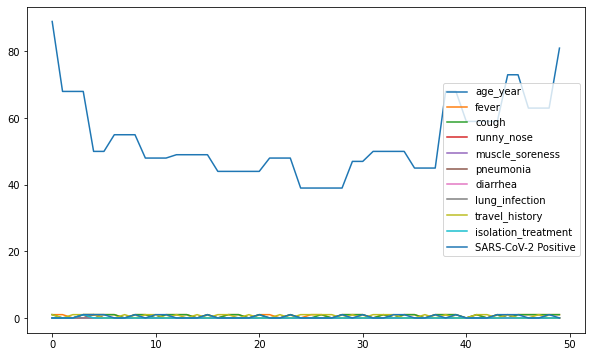

In [ ]:
df.plot.line() #plotting line graph

# **DATA PROCESSING**

In [ ]:
#renaming target column
df=(df.rename(columns={'SARS-CoV-2 Positive' : 'RESULTS'}))
print(df)

    gender  age_year  fever  cough  runny_nose  muscle_soreness  pneumonia  \
0     male        89      1      1           0                0          0   
1     male        68      1      0           0                0          0   
2     male        68      0      0           0                0          0   
3     male        68      1      1           0                0          0   
4     male        50      1      1           1                0          1   
5     male        50      1      1           0                0          0   
6   female        55      1      1           0                0          0   
7   female        55      0      0           0                0          0   
8   female        55      1      1           0                0          0   
9   female        48      1      1           0                0          0   
10  female        48      0      0           0                0          0   
11  female        48      1      1           0                0 

In [ ]:
df.columns


Index(['gender', 'age_year', 'fever', 'cough', 'runny_nose', 'muscle_soreness',
       'pneumonia', 'diarrhea', 'lung_infection', 'travel_history',
       'isolation_treatment', 'RESULTS'],
      dtype='object')

In [ ]:
df=(df.drop(['gender','travel_history','isolation_treatment'],axis=1))
print(df)

In [ ]:
#finding  null value if any
df.isnull()

In [ ]:
df.isnull().sum()

age_year           0
fever              0
cough              0
runny_nose         0
muscle_soreness    0
pneumonia          0
diarrhea           0
lung_infection     0
RESULTS            0
dtype: int64

# **FEATURE SELECTION(univariate selection)**

In [ ]:
x = df.iloc[:,0:50]
y = df.iloc[:,-1]
x.shape

(50, 9)

In [ ]:
y.shape

(50,)

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
bestfit=bestfeatures.fit(x,y)


In [ ]:
dfscores = pd.DataFrame({"scores":bestfit.scores_,"P_values":bestfit.pvalues_},index=x.columns)

print(dfscores.nlargest(5,'P_values'))

                  scores  P_values
age_year        0.187898  0.664672
fever           0.884065  0.347091
runny_nose      1.631579  0.201485
pneumonia       1.631579  0.201485
lung_infection  1.631579  0.201485


In [ ]:
df=(df.drop(['diarrhea','muscle_soreness','age_year'],axis=1))
print(df)

    fever  cough  runny_nose  pneumonia  lung_infection  RESULTS
0       1      1           0          0               0        0
1       1      0           0          0               0        0
2       0      0           0          0               0        0
3       1      1           0          0               0        1
4       1      1           1          1               0        1
5       1      1           0          0               0        1
6       1      1           0          0               0        0
7       0      0           0          0               0        0
8       1      1           0          0               0        1
9       1      1           0          0               0        0
10      0      0           0          0               0        1
11      1      1           0          0               0        1
12      1      1           0          0               0        0
13      1      1           0          0               0        0
14      0      0         

# **MODEL SELECTION**

In [ ]:

xtrain,xtest,ytrain,ytest=train_test_split(df[['fever']],df.RESULTS,test_size=0.3,random_state=32)


In [ ]:
regModel =linear_model.LogisticRegression()
regModel.fit(xtrain,ytrain)
regModel_pred=regModel.predict(xtest)

In [ ]:

print("accuracy of logistic regression is :",metrics.accuracy_score(ytest,regModel_pred)*100)

accuracy of logistic regression is : 80.0


**SELECTED MODEL : K logistic regression**

In [ ]:
confmat = confusion_matrix(ytest,regModel_pred)
confmat

array([[12,  0],
       [ 3,  0]])

In [ ]:
regModel= linear_model.LogisticRegression()
regModel.fit(xtrain,ytrain)
regModel_pred=regModel.predict(xtest)
regModel_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
ytest

49    0
16    0
41    0
35    0
44    1
8     1
31    0
12    0
26    0
2     0
36    0
29    0
40    0
27    0
45    1
Name: RESULTS, dtype: int64

In [ ]:
print( classification_report(ytest,regModel_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       0.00      0.00      0.00         3

    accuracy                           0.80        15
   macro avg       0.40      0.50      0.44        15
weighted avg       0.64      0.80      0.71        15



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
